In [1]:
import geopandas
import pandas as pd
import os
print(os.getcwd())

/Users/brandon.mcneil/Metis_Material/MTA_Project/Data/inbound


In [2]:
mta_stations = geopandas.read_file("/Users/brandon.mcneil/downloads/DOITT_SUBWAY_STATION_04JAN2017.zip")
#https://data.cityofnewyork.us/Transportation/Subway-Stations/arq3-7z49

nycnta = geopandas.read_file("/Users/brandon.mcneil/downloads/nynta_21a")
#https://data.cityofnewyork.us/City-Government/Neighborhood-Tabulation-Areas-NTA-/cpf4-rkhq


In [3]:
mta_stations.head(5)

,OBJECTID,NAME,URL,LINE,NOTES,geometry
0,1,Astor Pl,http://web.mta.info/nyct/service/,4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s...",POINT (986725.002 205255.053)
1,2,Canal St,http://web.mta.info/nyct/service/,4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s...",POINT (984196.500 201155.840)
2,3,50th St,http://web.mta.info/nyct/service/,1-2,"1-all times, 2-nights",POINT (988724.216 216795.191)
3,4,Bergen St,http://web.mta.info/nyct/service/,2-3-4,"4-nights, 3-all other times, 2-all times",POINT (991184.246 187333.844)
4,5,Pennsylvania Ave,http://web.mta.info/nyct/service/,3-4,"4-nights, 3-all other times",POINT (1013411.541 181467.289)


In [38]:
#geospatial join
joined = geopandas.sjoin(nycnta, mta_stations, op = 'contains', how='left')
joined.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 543 entries, 0 to 194
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   BoroCode     543 non-null    int64   
 1   BoroName     543 non-null    object  
 2   CountyFIPS   543 non-null    object  
 3   NTACode      543 non-null    object  
 4   NTAName      543 non-null    object  
 5   Shape_Leng   543 non-null    float64 
 6   Shape_Area   543 non-null    float64 
 7   geometry     543 non-null    geometry
 8   index_right  473 non-null    float64 
 9   OBJECTID     473 non-null    float64 
 10  NAME         473 non-null    object  
 11  URL          473 non-null    object  
 12  LINE         473 non-null    object  
 13  NOTES        473 non-null    object  
dtypes: float64(4), geometry(1), int64(1), object(8)
memory usage: 63.6+ KB


(543, 14)

In [7]:
nycnta.shape, mta_stations.shape

((195, 8), (473, 6))

In [8]:
joined = joined[joined['index_right'].notna()]

In [9]:
zip = geopandas.read_file("/Users/brandon.mcneil/downloads/ZIP_CODE_040114.zip")
#https://data.cityofnewyork.us/Business/Zip-Code-Boundaries/i8iw-xf4u

In [36]:
zipcode_merge = geopandas.sjoin(zip, mta_stations, op = 'contains', how='left')
zipcode_merge.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 610 entries, 0 to 262
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ZIPCODE      610 non-null    object  
 1   BLDGZIP      610 non-null    object  
 2   PO_NAME      610 non-null    object  
 3   POPULATION   610 non-null    float64 
 4   AREA         610 non-null    float64 
 5   STATE        610 non-null    object  
 6   COUNTY       610 non-null    object  
 7   ST_FIPS      610 non-null    object  
 8   CTY_FIPS     610 non-null    object  
 9   URL_left     610 non-null    object  
 10  SHAPE_AREA   610 non-null    float64 
 11  SHAPE_LEN    610 non-null    float64 
 12  geometry     610 non-null    geometry
 13  index_right  473 non-null    float64 
 14  OBJECTID     473 non-null    float64 
 15  NAME         473 non-null    object  
 16  URL_right    473 non-null    object  
 17  LINE         473 non-null    object  
 18  NOTES        473 non-n

In [11]:
zipcode_merge = zipcode_merge[zipcode_merge['index_right'].notna()]

In [12]:
df_spatial_join = joined.merge(zipcode_merge,  how ='left', left_on = 'OBJECTID', right_on = 'OBJECTID')


,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry_x,index_right_x,OBJECTID,...,CTY_FIPS,URL_left,SHAPE_AREA,SHAPE_LEN,geometry_y,index_right_y,NAME_y,URL_right,LINE_y,NOTES_y
0,3,Brooklyn,047,BK88,Borough Park,39247.227831,5.400502e+07,"POLYGON ((990897.900 169268.121, 990588.252 16...",337.0,338.0,...,047,http://www.usps.com/,0.0,0.0,"POLYGON ((994099.296 171240.706, 994181.969 17...",337.0,Ave N,http://web.mta.info/nyct/service/,F,F-all times
1,3,Brooklyn,047,BK88,Borough Park,39247.227831,5.400502e+07,"POLYGON ((990897.900 169268.121, 990588.252 16...",311.0,312.0,...,047,http://www.usps.com/,0.0,0.0,"POLYGON ((987286.352 173946.462, 987259.064 17...",311.0,Ft Hamilton Pkwy,http://web.mta.info/nyct/service/,N,N-all times
2,3,Brooklyn,047,BK88,Borough Park,39247.227831,5.400502e+07,"POLYGON ((990897.900 169268.121, 990588.252 16...",61.0,62.0,...,047,http://www.usps.com/,0.0,0.0,"POLYGON ((987286.352 173946.462, 987259.064 17...",61.0,55th St,http://web.mta.info/nyct/service/,D,D-all times
3,3,Brooklyn,047,BK88,Borough Park,39247.227831,5.400502e+07,"POLYGON ((990897.900 169268.121, 990588.252 16...",310.0,311.0,...,047,http://www.usps.com/,0.0,0.0,"POLYGON ((987286.352 173946.462, 987259.064 17...",310.0,50th St,http://web.mta.info/nyct/service/,D,D-all times
4,3,Brooklyn,047,BK25,Homecrest,27514.022918,2.999197e+07,"POLYGON ((995746.857 161665.390, 995833.832 16...",325.0,326.0,...,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991748.394 161084.840, 991777.821 16...",325.0,Kings Hwy,http://web.mta.info/nyct/service/,F,F-all times
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,3,Brooklyn,047,BK90,East Williamsburg,49247.014740,3.913241e+07,"POLYGON ((1005302.497 199455.730, 1005307.792 ...",71.0,72.0,...,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1004708.889 202095.457, 1004867.276 ...",71.0,Lorimer St,http://web.mta.info/nyct/service/,L,L-all times
469,3,Brooklyn,047,BK90,East Williamsburg,49247.014740,3.913241e+07,"POLYGON ((1005302.497 199455.730, 1005307.792 ...",149.0,150.0,...,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1004708.889 202095.457, 1004867.276 ...",149.0,Graham Ave,http://web.mta.info/nyct/service/,L,L-all times
470,3,Brooklyn,047,BK90,East Williamsburg,49247.014740,3.913241e+07,"POLYGON ((1005302.497 199455.730, 1005307.792 ...",75.0,76.0,...,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1002987.943 197218.048, 1003016.011 ...",75.0,Lorimer St,http://web.mta.info/nyct/service/,J-M,"J-all times, skips weekdays AM westbound, PM e..."
471,3,Brooklyn,047,BK90,East Williamsburg,49247.014740,3.913241e+07,"POLYGON ((1005302.497 199455.730, 1005307.792 ...",70.0,71.0,...,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1002987.943 197218.048, 1003016.011 ...",70.0,Broadway,http://web.mta.info/nyct/service/,G,G-all times


In [13]:
income_df = pd.read_csv("/Users/brandon.mcneil/downloads/CensusInfo_2019_all_households.csv")
#https://data.cccnewyork.org/data/map/66/median-incomes#66/39/6/107/62/a/a 
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Location        181 non-null    object
 1   Zip             181 non-null    int64 
 2   Household Type  181 non-null    object
 3   TimeFrame       181 non-null    int64 
 4   DataFormat      181 non-null    object
 5   Data            181 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 8.6+ KB


In [15]:
df_spatial_join['ZIPCODE'] = df_spatial_join['ZIPCODE'].astype(int)

income_spatial_join = df_spatial_join.merge(income_df, how = 'left', left_on = 'ZIPCODE', right_on = 'Zip')

In [21]:
income_spatial_join.to_csv('income_spatial_join.csv', index=False)  

<AxesSubplot:>

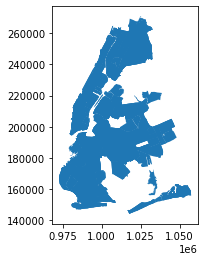

In [34]:
zipcode_merge.plot()